# TP 3

## Parte  I:  Análisis  exploratorio

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import time

In [2]:
df_train_identity = pd.read_csv('train_identity.csv', low_memory=False)
df_train_transaction = pd.read_csv('train_transaction.csv', low_memory=False)

### Reviso el df_train_transaction

In [3]:
df_train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,nan,150.00,discover,142.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,nan,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590536,3577536,0,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590537,3577537,0,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590538,3577538,0,15811088,117.00,W,7826,481.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [4]:
df_train_transaction.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   int64  
 1   isFraud         int64  
 2   TransactionDT   int64  
 3   TransactionAmt  float64
 4   ProductCD       object 
 5   card1           int64  
 6   card2           float64
 7   card3           float64
 8   card4           object 
 9   card5           float64
 10  card6           object 
 11  addr1           float64
 12  addr2           float64
 13  dist1           float64
 14  dist2           float64
 15  P_emaildomain   object 
 16  R_emaildomain   object 
 17  C1              float64
 18  C2              float64
 19  C3              float64
 20  C4              float64
 21  C5              float64
 22  C6              float64
 23  C7              float64
 24  C8              float64
 25  C9              float64
 26  C10             float64
 27  C11             float64
 28  C12          

In [5]:
df_train_transaction['isFraud'] = df_train_transaction['isFraud'].astype('bool')
df_train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,False,86400,68.50,W,13926,nan,150.00,discover,142.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,False,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2987002,False,86469,59.00,W,4663,490.00,150.00,visa,166.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2987003,False,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2987004,False,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,False,15811047,49.00,W,6550,nan,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590536,3577536,False,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590537,3577537,False,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590538,3577538,False,15811088,117.00,W,7826,481.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [6]:
df_train_transaction.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   int64  
 1   isFraud         bool   
 2   TransactionDT   int64  
 3   TransactionAmt  float64
 4   ProductCD       object 
 5   card1           int64  
 6   card2           float64
 7   card3           float64
 8   card4           object 
 9   card5           float64
 10  card6           object 
 11  addr1           float64
 12  addr2           float64
 13  dist1           float64
 14  dist2           float64
 15  P_emaildomain   object 
 16  R_emaildomain   object 
 17  C1              float64
 18  C2              float64
 19  C3              float64
 20  C4              float64
 21  C5              float64
 22  C6              float64
 23  C7              float64
 24  C8              float64
 25  C9              float64
 26  C10             float64
 27  C11             float64
 28  C12          

In [7]:
for col, values in df_train_transaction.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


isFraud: 2
[False  True]


TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 ... 13166  8767 18038]


card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297.

In [8]:
for i in df_train_transaction.columns: 
    promedio = 100*df_train_transaction[i].isnull().sum()/len(df_train_transaction[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna TransactionID tiene 0.0 % de elementos nulos
La columna isFraud tiene 0.0 % de elementos nulos
La columna TransactionDT tiene 0.0 % de elementos nulos
La columna TransactionAmt tiene 0.0 % de elementos nulos
La columna ProductCD tiene 0.0 % de elementos nulos
La columna card1 tiene 0.0 % de elementos nulos
La columna card2 tiene 1.5126833068039423 % de elementos nulos
La columna card3 tiene 0.26501168422122123 % de elementos nulos
La columna card4 tiene 0.267043722694483 % de elementos nulos
La columna card5 tiene 0.7212043214684865 % de elementos nulos
La columna card6 tiene 0.26602770345785215 % de elementos nulos
La columna addr1 tiene 11.12642666034477 % de elementos nulos
La columna addr2 tiene 11.12642666034477 % de elementos nulos
La columna dist1 tiene 59.6523520845328 % de elementos nulos
La columna dist2 tiene 93.62837403054831 % de elementos nulos
La columna P_emaildomain tiene 15.99485216920107 % de elementos nulos
La columna R_emaildomain tiene 76.75161716395164

### Reviso el df_train_identity

In [9]:
df_train_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.00,"70,787.00",nan,NaN,NaN,NaN,NaN,NaN,nan,...,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.00,"98,945.00",nan,NaN,0.0,-5.0,NaN,NaN,nan,...,mobile safari 11.0,32.00,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.00,"191,631.00",0.00,0.0,0.0,0.0,NaN,NaN,0.00,...,chrome 62.0,nan,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.00,"221,832.00",nan,NaN,0.0,-6.0,NaN,NaN,nan,...,chrome 62.0,nan,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.00,"7,460.00",0.00,0.0,1.0,0.0,NaN,NaN,0.00,...,chrome 62.0,24.00,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244308,3577521,-15.00,"145,955.00",0.00,0.0,0.0,0.0,NaN,NaN,0.00,...,chrome 66.0 for android,nan,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
244309,3577526,-5.00,"172,059.00",nan,NaN,1.0,-5.0,NaN,NaN,nan,...,chrome 55.0 for android,32.00,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
244310,3577529,-20.00,"632,381.00",nan,NaN,-1.0,-36.0,NaN,NaN,nan,...,chrome 65.0 for android,nan,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
244311,3577531,-5.00,"55,528.00",0.00,0.0,0.0,-7.0,NaN,NaN,0.00,...,chrome 66.0,24.00,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [10]:
df_train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244313 entries, 0 to 244312
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  244313 non-null  object 
 1   id_01          244312 non-null  float64
 2   id_02          238809 non-null  float64
 3   id_03          113002 non-null  float64
 4   id_04          113003 non-null  object 
 5   id_05          232085 non-null  object 
 6   id_06          232085 non-null  object 
 7   id_07          8600 non-null    object 
 8   id_08          8600 non-null    object 
 9   id_09          126891 non-null  float64
 10  id_10          126891 non-null  float64
 11  id_11          238910 non-null  float64
 12  id_12          244312 non-null  object 
 13  id_13          218420 non-null  float64
 14  id_14          127623 non-null  float64
 15  id_15          238924 non-null  object 
 16  id_16          218006 non-null  object 
 17  id_17          236218 non-nul

In [11]:
for col, values in df_train_identity.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 144234
['2987004' '2987008' '2987010' ... '3577531' '3577534' 'c']


id_01: 77
[   0.   -5.  -15.  -10.  -20.  -40.  -30.  -25.  -55.  -45.  -70.  -90.
 -100.  -65.  -60.  -75.  -72.  -50.  -21.  -35.  -85.  -64.  -80.  -95.
  -87.  -58.   -7.  -12.  -11.   -9.  -27.  -42.   -6.  -62.  -18.  -76.
  -23.  -19.  -99.  -13.  -26.  -31.  -17.  -22.  -14.  -34.  -54.  -53.
  -28.  -88.  -16.  -61.  -46.  -94.  -24.  -93.  -44.  -89.  -92.  -37.
  -96.  -57.  -29.  -33.  -32.   -8.  -52.  -43.  -38.  -86.  -47.  -82.
  -48.  -63.  -71.  -56.  -51.   nan]


id_02: 115655
[ 70787.  98945. 191631. ... 172059. 632381.  55528.]


id_03: 24
[ nan   0.   3.   2.   5.   1.   6.   9.   4.  -5.  -9.  -2.  -4.  -1.
  -3.  -7.  -6. -11.   7.  -8.  10. -10.   8. -12. -13.]


id_04: 16
[nan '0.0' '-11.0' '-5.0' '-8.0' '-1.0' '-6.0' '-9.0' '-3.0' '-13.0'
 '-4.0' '-10.0' '-7.0' '-12.0' '-2.0' '-28.0' 'F']


id_05: 94
[nan '0.0' '1.0' '3.0' '2.0' '9.0' '12.0' '6.0' '4.0' '21.0' '7.0' '5.0'
 '1

In [12]:
for i in df_train_identity.columns: 
    promedio = 100*df_train_identity[i].isnull().sum()/len(df_train_identity[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna TransactionID tiene 0.0 % de elementos nulos
La columna id_01 tiene 0.0004093110067822834 % de elementos nulos
La columna id_02 tiene 2.2528477813296877 % de elementos nulos
La columna id_03 tiene 53.74703761158841 % de elementos nulos
La columna id_04 tiene 53.746628300581634 % de elementos nulos
La columna id_05 tiene 5.005054990933761 % de elementos nulos
La columna id_06 tiene 5.005054990933761 % de elementos nulos
La columna id_07 tiene 96.47992534167236 % de elementos nulos
La columna id_08 tiene 96.47992534167236 % de elementos nulos
La columna id_09 tiene 48.06211703838928 % de elementos nulos
La columna id_10 tiene 48.06211703838928 % de elementos nulos
La columna id_11 tiene 2.211507369644677 % de elementos nulos
La columna id_12 tiene 0.0004093110067822834 % de elementos nulos
La columna id_13 tiene 10.598289898613663 % de elementos nulos
La columna id_14 tiene 47.76250138142465 % de elementos nulos
La columna id_15 tiene 2.205777015549725 % de elementos nulos
La 

Se observa que las columnas: id_03, id_04, id_07 - id_10, id_14, id_18, id_21 - id_27, id_30, id_32 - id_34 tienen casi o más de la mitad de sus elementos nulos.

Las columnas que parecen mas interesantes son: id_01 e id_12 que casi no tienen elementos nulos

In [13]:
if (df_train_identity['TransactionID'].str.isalnum().any() == False):
    print(df_train_identity['TransactionID'])

In [14]:
df_train_identity.index[df_train_identity.iloc[:,0].str.contains('c')]

Int64Index([190156], dtype='int64')

In [15]:
df_train_identity.iloc[190156,:]

TransactionID         c
id_01               NaN
id_02               NaN
id_03               NaN
id_04                 F
id_05                 F
id_06                 F
id_07                 F
id_08            mobile
id_09               NaN
id_10               NaN
id_11               NaN
id_12               NaN
id_13               NaN
id_14               NaN
id_15               NaN
id_16               NaN
id_17               NaN
id_18               NaN
id_19               NaN
id_20               NaN
id_21               NaN
id_22               NaN
id_23               NaN
id_24               NaN
id_25               NaN
id_26               NaN
id_27               NaN
id_28               NaN
id_29               NaN
id_30               NaN
id_31               NaN
id_32               NaN
id_33               NaN
id_34               NaN
id_35               NaN
id_36               NaN
id_37               NaN
id_38               NaN
DeviceType          NaN
DeviceInfo          NaN
Name: 190156, dt

In [16]:
df_train_identity = df_train_identity.drop([190156])

In [17]:
df_train_identity['TransactionID'] = df_train_identity['TransactionID'].astype(np.int64)
df_train_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.00,"70,787.00",nan,NaN,NaN,NaN,NaN,NaN,nan,...,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.00,"98,945.00",nan,NaN,0.0,-5.0,NaN,NaN,nan,...,mobile safari 11.0,32.00,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.00,"191,631.00",0.00,0.0,0.0,0.0,NaN,NaN,0.00,...,chrome 62.0,nan,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.00,"221,832.00",nan,NaN,0.0,-6.0,NaN,NaN,nan,...,chrome 62.0,nan,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.00,"7,460.00",0.00,0.0,1.0,0.0,NaN,NaN,0.00,...,chrome 62.0,24.00,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244308,3577521,-15.00,"145,955.00",0.00,0.0,0.0,0.0,NaN,NaN,0.00,...,chrome 66.0 for android,nan,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
244309,3577526,-5.00,"172,059.00",nan,NaN,1.0,-5.0,NaN,NaN,nan,...,chrome 55.0 for android,32.00,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
244310,3577529,-20.00,"632,381.00",nan,NaN,-1.0,-36.0,NaN,NaN,nan,...,chrome 65.0 for android,nan,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
244311,3577531,-5.00,"55,528.00",0.00,0.0,0.0,-7.0,NaN,NaN,0.00,...,chrome 66.0,24.00,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


### Uno los df

In [18]:
df_identities_y_transactions = pd.merge(right = df_train_identity, left = df_train_transaction, left_on='TransactionID', right_on='TransactionID', how = 'outer')
df_identities_y_transactions

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,False,86400,68.50,W,13926,nan,150.00,discover,142.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,False,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,False,86469,59.00,W,4663,490.00,150.00,visa,166.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,False,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,False,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,...,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690614,3577535,False,15811047,49.00,W,6550,nan,150.00,visa,226.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690615,3577536,False,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690616,3577537,False,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690617,3577538,False,15811088,117.00,W,7826,481.00,150.00,mastercard,224.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_identities_y_transactions = df_identities_y_transactions.drop_duplicates()
df_identities_y_transactions

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,False,86400,68.50,W,13926,nan,150.00,discover,142.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,False,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,False,86469,59.00,W,4663,490.00,150.00,visa,166.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,False,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,False,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,...,samsung browser 6.2,32.00,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690614,3577535,False,15811047,49.00,W,6550,nan,150.00,visa,226.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690615,3577536,False,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690616,3577537,False,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690617,3577538,False,15811088,117.00,W,7826,481.00,150.00,mastercard,224.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_identities_y_transactions_con_fraude = df_identities_y_transactions.loc[df_identities_y_transactions['isFraud'] == True, :]
df_identities_y_transactions_con_fraude

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
203,2987203,True,89760,445.00,W,18268,583.00,150.00,visa,226.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,True,90193,37.10,C,13413,103.00,185.00,visa,137.00,...,chrome 54.0 for android,nan,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
243,2987243,True,90246,37.10,C,13413,103.00,185.00,visa,137.00,...,chrome 54.0 for android,nan,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
245,2987245,True,90295,37.10,C,13413,103.00,185.00,visa,137.00,...,chrome 54.0 for android,nan,NaN,NaN,F,F,T,T,mobile,Redmi Note 4 Build/MMB29M
288,2987288,True,90986,155.52,C,16578,545.00,185.00,visa,226.00,...,chrome 62.0 for ios,nan,NaN,NaN,F,F,F,F,mobile,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690411,3577361,True,15807368,"1,224.00",W,3278,453.00,150.00,visa,226.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690414,3577364,True,15807516,69.96,C,5812,408.00,185.00,mastercard,224.00,...,samsung browser 6.4,nan,NaN,NaN,F,F,T,F,mobile,SAMSUNG SM-J700M Build/MMB29K
690420,3577368,True,15807677,100.00,H,6758,399.00,150.00,american express,146.00,...,mobile safari 11.0,32.00,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device
690425,3577372,True,15807758,117.00,W,14037,111.00,150.00,visa,226.00,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for col, values in df_identities_y_transactions_con_fraude.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 20663
[2987203 2987240 2987243 ... 3577368 3577372 3577526]


isFraud: 1
[ True]


TransactionDT: 20638
[   89760    90193    90246 ... 15807677 15807758 15810876]


TransactionAmt: 2515
[445.     37.098 155.521 ...  38.414 125.665  69.964]


ProductCD: 5
['W' 'C' 'R' 'S' 'H']


card1: 1740
[18268 13413 16578 ...  6872 14337  6758]


card2: 327
[583. 103. 545. 562. 500. 408.  nan 364. 360. 269. 296. 130. 321. 476.
 555. 225. 490. 100. 481. 170. 250. 565. 111. 122. 390. 194. 514. 361.
 327. 525. 311. 399. 553. 543. 404. 494. 216. 459. 158. 142. 202. 174.
 268. 104. 177. 176. 215. 449. 384. 512. 181. 343. 247. 204. 231. 479.
 308. 417. 375. 279. 271. 385. 266. 264. 595. 453. 498. 405. 298. 141.
 318. 369. 310. 238. 297. 341. 528. 414. 160. 382. 346. 205. 134. 558.
 536. 572. 273. 517. 435. 148. 567. 407. 474. 455. 492. 245. 511. 359.
 413. 478. 393. 199. 254. 537. 520. 480. 554. 440. 549. 504. 289. 118.
 575. 207. 128. 180. 272. 454. 445. 515. 560. 496. 324. 303. 155. 547.

### Gráficos

#### Gráfico 1

In [252]:
df_train_identity_por_id_01 = df_identities_y_transactions.loc[:, ('TransactionID', 'isFraud', 'id_01')]
df_train_identity_por_id_01 = df_train_identity_por_id_01.groupby(['id_01', 'isFraud']).count()
df_train_identity_por_id_01 = df_train_identity_por_id_01.rename(columns = {'TransactionID' : 'Cantidad de transacciones correspondientes por id_01'})
df_train_identity_por_id_01 = df_train_identity_por_id_01.unstack()
df_train_identity_por_id_01

Cantidad de transacciones correspondientes por id_01  \
isFraud                                                False   
id_01                                                          
-100.00                                             745.00     
 -99.00                                               2.00     
 -96.00                                               3.00     
 -95.00                                             336.00     
 -94.00                                               1.00     
...                                                    ...     
  -8.00                                               2.00     
  -7.00                                              10.00     
  -6.00                                              14.00     
  -5.00                                          77,407.00     
   0.00                                          18,582.00     

                              
isFraud                True   
id_01                         
-100.00               267.00  
 -99.00                  nan  
 -96.00                  nan  
 -95.00                92.00  
 -94.00                  nan  
...                      ...  
  -8.00                  nan  
  -7.00                  nan  
  -6.00                 1.00  
  -5.00             4,763.00  
   0.00               973.00  

[77 rows x 2 columns]

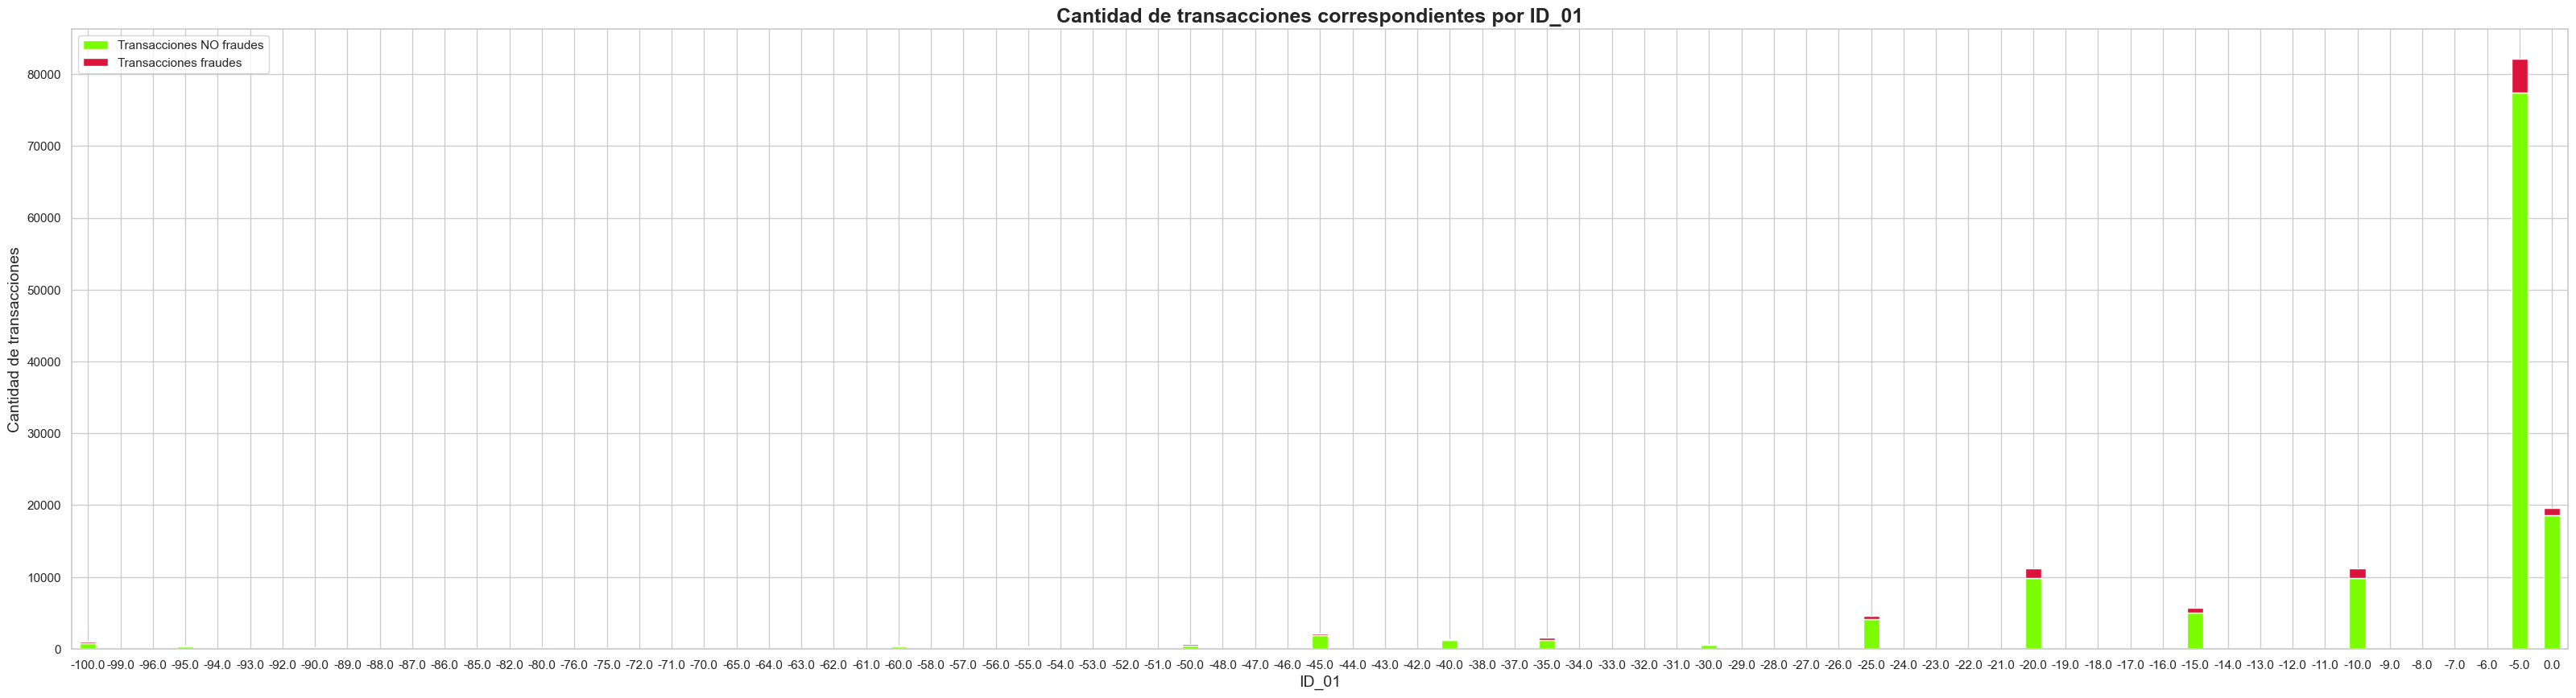

In [253]:
df_train_identity_por_id_01.plot.bar(stacked = True, rot = 0, color = {'crimson','lawngreen'}, figsize=(40,10))
plt.xlabel('ID_01', size = 14)
plt.ylabel('Cantidad de transacciones', size = 14)
plt.legend(("Transacciones NO fraudes","Transacciones fraudes"),loc="upper left")
plt.title('Cantidad de transacciones correspondientes por ID_01', fontweight='bold', size = 18)
plt.show()

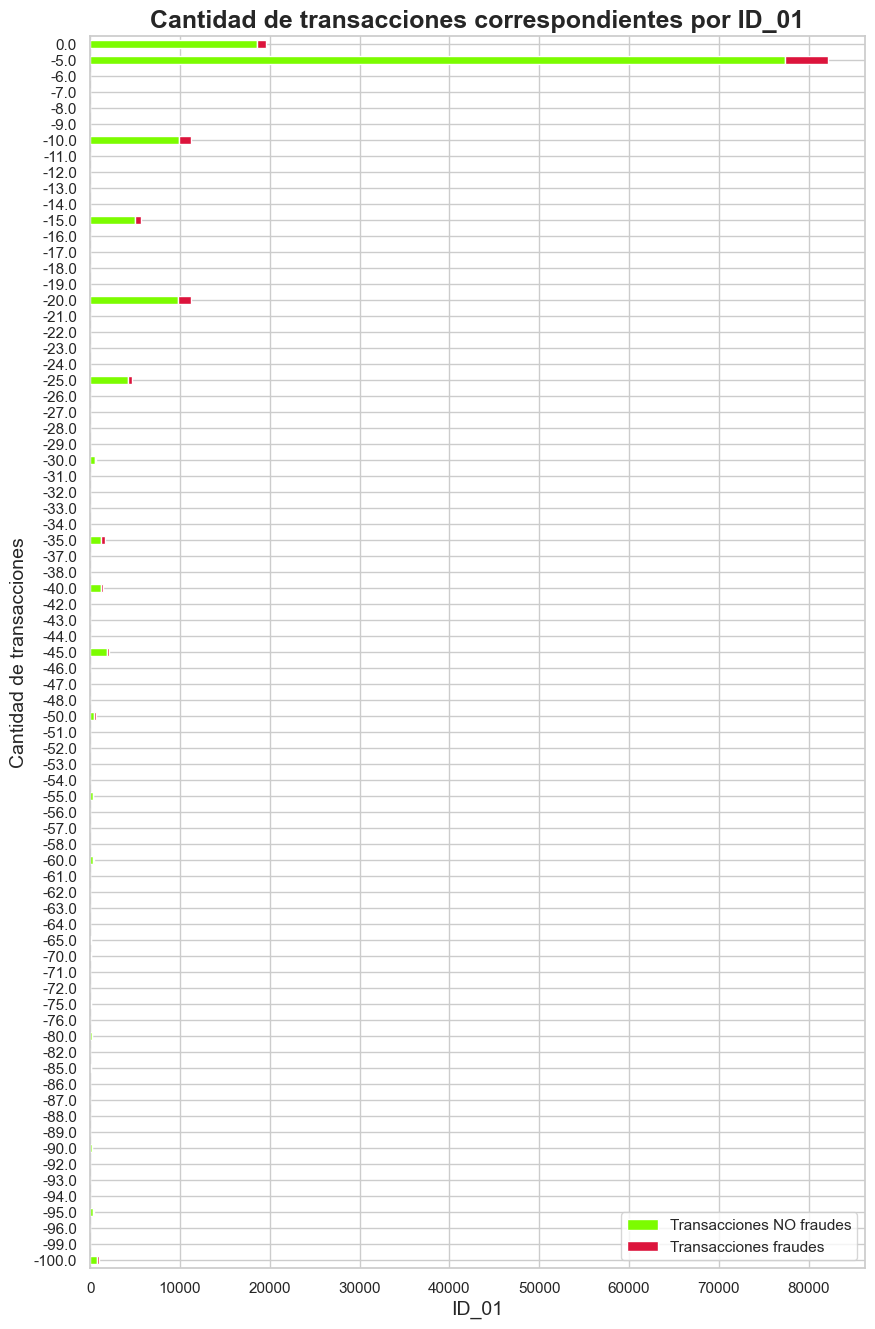

In [254]:
df_train_identity_por_id_01.plot.barh(stacked = True, rot = 0, color = {'crimson','lawngreen'}, figsize=(10,16))
plt.xlabel('ID_01', size = 14)
plt.ylabel('Cantidad de transacciones', size = 14)
plt.legend(("Transacciones NO fraudes","Transacciones fraudes"),loc="lower right")
plt.title('Cantidad de transacciones correspondientes por ID_01', fontweight='bold', size = 18)
plt.show()

#### Gráfico 2

In [255]:
df_train_identity_por_id_31 = df_identities_y_transactions_con_fraude.loc[:, ('TransactionAmt', 'id_31')]
df_train_identity_por_id_31 = df_train_identity_por_id_31.groupby(['id_31']).sum()
df_train_identity_por_id_31 = df_train_identity_por_id_31.rename(columns = {'TransactionAmt' : 'Monto total acumulado por id_31'})
df_train_identity_por_id_31 = df_train_identity_por_id_31.sort_values(by = ['Monto total acumulado por id_31'], ascending = False)
df_train_identity_por_id_31 = df_train_identity_por_id_31.reset_index()
df_train_identity_por_id_31_top_10 = df_train_identity_por_id_31.head(10)
df_train_identity_por_id_31_top_10

,id_31,Monto total acumulado por id_31
0,mobile safari generic,"151,593.97"
1,mobile safari 11.0,"135,934.55"
2,chrome 63.0,"102,077.50"
3,chrome generic,"56,523.65"
4,chrome 65.0,"43,425.95"
5,chrome 64.0,"43,301.17"
6,chrome 63.0 for android,"32,342.10"
7,safari generic,"29,862.92"
8,ie 11.0 for desktop,"28,934.73"
9,chrome 66.0,"27,274.91"


In [256]:
df_train_identity_por_id_31 = df_identities_y_transactions_con_fraude.loc[:, ('TransactionAmt', 'id_31')]
df_train_identity_por_id_31

,TransactionAmt,id_31
203,445.00,NaN
240,37.10,chrome 54.0 for android
243,37.10,chrome 54.0 for android
245,37.10,chrome 54.0 for android
288,155.52,chrome 62.0 for ios
...,...,...
690411,"1,224.00",NaN
690414,69.96,samsung browser 6.4
690420,100.00,mobile safari 11.0
690425,117.00,NaN


In [257]:
df_top_10_navegadores_fraudes = pd.merge(right = df_train_identity_por_id_31_top_10, left = df_train_identity_por_id_31, left_on='id_31', right_on='id_31', how = 'inner')
df_top_10_navegadores_fraudes = df_top_10_navegadores_fraudes.dropna()
df_top_10_navegadores_fraudes = df_top_10_navegadores_fraudes.rename(columns = {'TransactionAmt' : 'Monto de la transacción'})
df_top_10_navegadores_fraudes = df_top_10_navegadores_fraudes.rename(columns = {'id_31' : 'Navegador'})
df_top_10_navegadores_fraudes

,Monto de la transacción,Navegador,Monto total acumulado por id_31
0,90.57,mobile safari 11.0,"135,934.55"
1,450.00,mobile safari 11.0,"135,934.55"
2,450.00,mobile safari 11.0,"135,934.55"
3,150.00,mobile safari 11.0,"135,934.55"
4,150.00,mobile safari 11.0,"135,934.55"
...,...,...,...
7014,70.70,chrome 66.0,"27,274.91"
7015,70.70,chrome 66.0,"27,274.91"
7016,70.70,chrome 66.0,"27,274.91"
7017,70.70,chrome 66.0,"27,274.91"


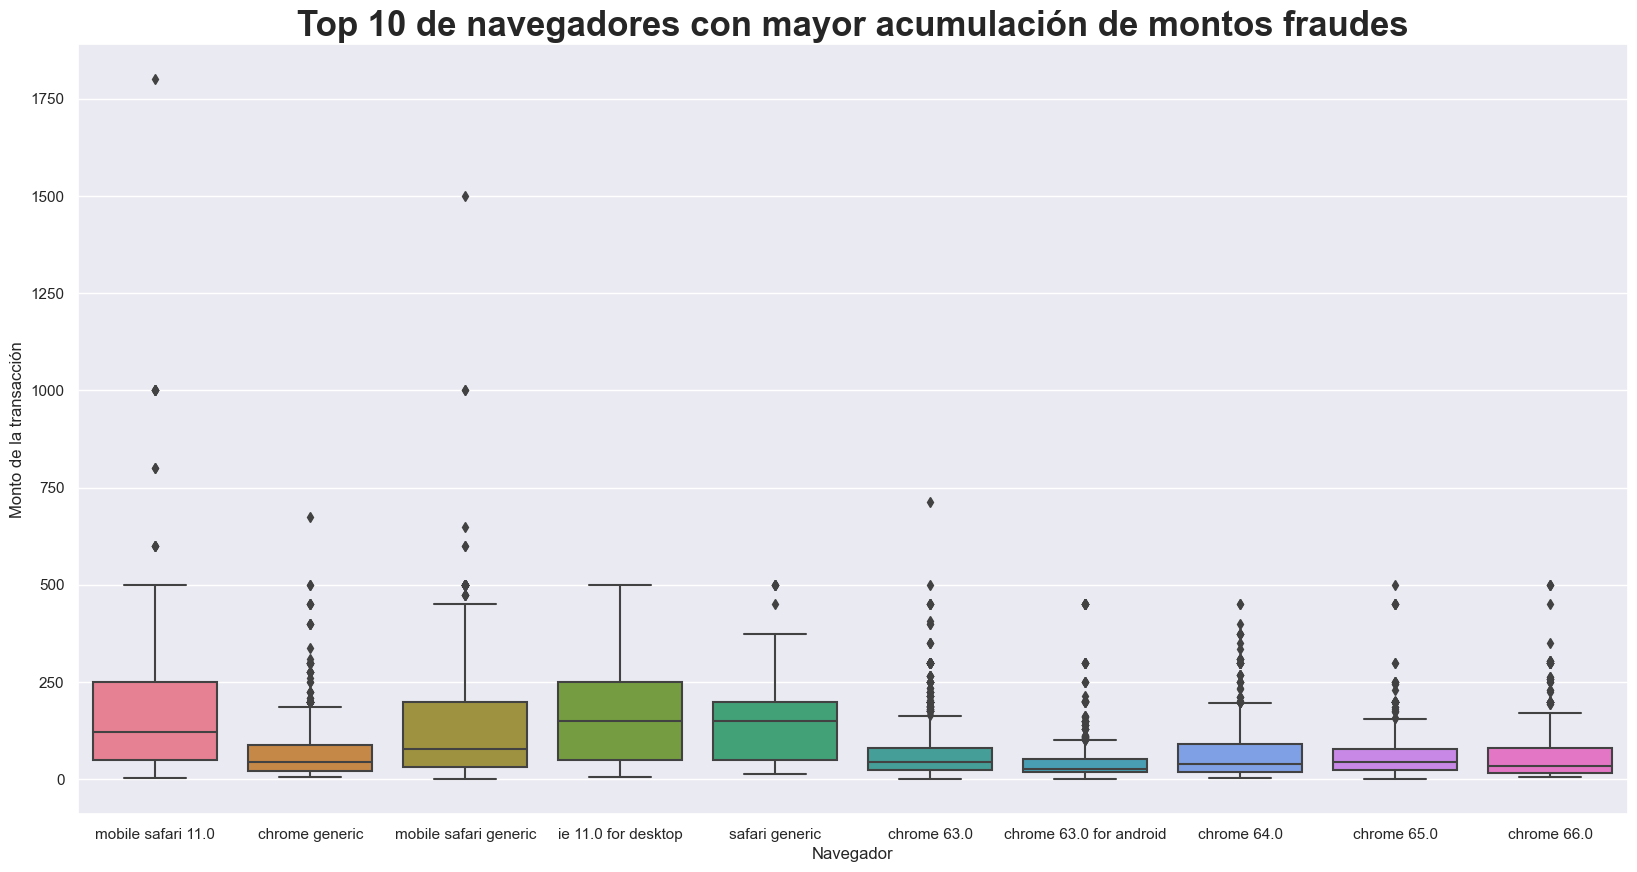

In [258]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=df_top_10_navegadores_fraudes['Navegador'], y=df_top_10_navegadores_fraudes['Monto de la transacción'], palette="husl").set_title("Top 10 de navegadores con mayor acumulación de montos fraudes", weight = 'bold', size = 25)
plt.show()

#### Gráfico 3

In [259]:
df_train_identity_por_devices = df_identities_y_transactions_con_fraude.loc[:, ('TransactionAmt', 'DeviceInfo')]
df_train_identity_por_devices = df_train_identity_por_devices.groupby(['DeviceInfo']).sum()
df_train_identity_por_devices = df_train_identity_por_devices.rename(columns = {'TransactionAmt' : 'Monto total acumulado por DeviceInfo'})
df_train_identity_por_devices = df_train_identity_por_devices.sort_values(by = ['Monto total acumulado por DeviceInfo'], ascending = False)
df_train_identity_por_devices = df_train_identity_por_devices.reset_index()
df_train_identity_por_devices_top_10 = df_train_identity_por_devices.head(10)
df_train_identity_por_devices_top_10

,DeviceInfo,Monto total acumulado por DeviceInfo
0,iOS Device,"269,517.00"
1,Windows,"261,684.46"
2,MacOS,"42,741.00"
3,rv:11.0,"19,804.63"
4,KFFOWI Build/LVY48F,"9,365.00"
5,rv:57.0,"9,169.82"
6,Trident/7.0,"8,840.10"
7,SM-G950U Build/NRD90M,"6,800.00"
8,SM-A300H Build/LRX22G,"6,119.73"
9,LG-D320 Build/KOT49I.V10a,"5,575.89"


In [260]:
df_train_identity_por_DeviceInfo = df_identities_y_transactions_con_fraude.loc[:, ('TransactionAmt', 'DeviceInfo')]
df_train_identity_por_DeviceInfo

,TransactionAmt,DeviceInfo
203,445.00,NaN
240,37.10,Redmi Note 4 Build/MMB29M
243,37.10,Redmi Note 4 Build/MMB29M
245,37.10,Redmi Note 4 Build/MMB29M
288,155.52,NaN
...,...,...
690411,"1,224.00",NaN
690414,69.96,SAMSUNG SM-J700M Build/MMB29K
690420,100.00,iOS Device
690425,117.00,NaN


In [261]:
df_top_10_dispositivos_fraudes = pd.merge(right = df_train_identity_por_devices_top_10, left = df_train_identity_por_DeviceInfo, left_on='DeviceInfo', right_on='DeviceInfo', how = 'inner')
df_top_10_dispositivos_fraudes = df_top_10_dispositivos_fraudes.dropna()
df_top_10_dispositivos_fraudes = df_top_10_dispositivos_fraudes.rename(columns = {'TransactionAmt' : 'Monto de la transacción'})
df_top_10_dispositivos_fraudes = df_top_10_dispositivos_fraudes.rename(columns = {'DeviceInfo' : 'Información del dispositivo'})
df_top_10_dispositivos_fraudes

,Monto de la transacción,Información del dispositivo,Monto total acumulado por DeviceInfo
0,12.33,Windows,"261,684.46"
1,124.34,Windows,"261,684.46"
2,225.00,Windows,"261,684.46"
3,225.00,Windows,"261,684.46"
4,225.00,Windows,"261,684.46"
...,...,...,...
5206,86.32,LG-D320 Build/KOT49I.V10a,"5,575.89"
5207,87.30,LG-D320 Build/KOT49I.V10a,"5,575.89"
5208,87.30,LG-D320 Build/KOT49I.V10a,"5,575.89"
5209,87.30,LG-D320 Build/KOT49I.V10a,"5,575.89"


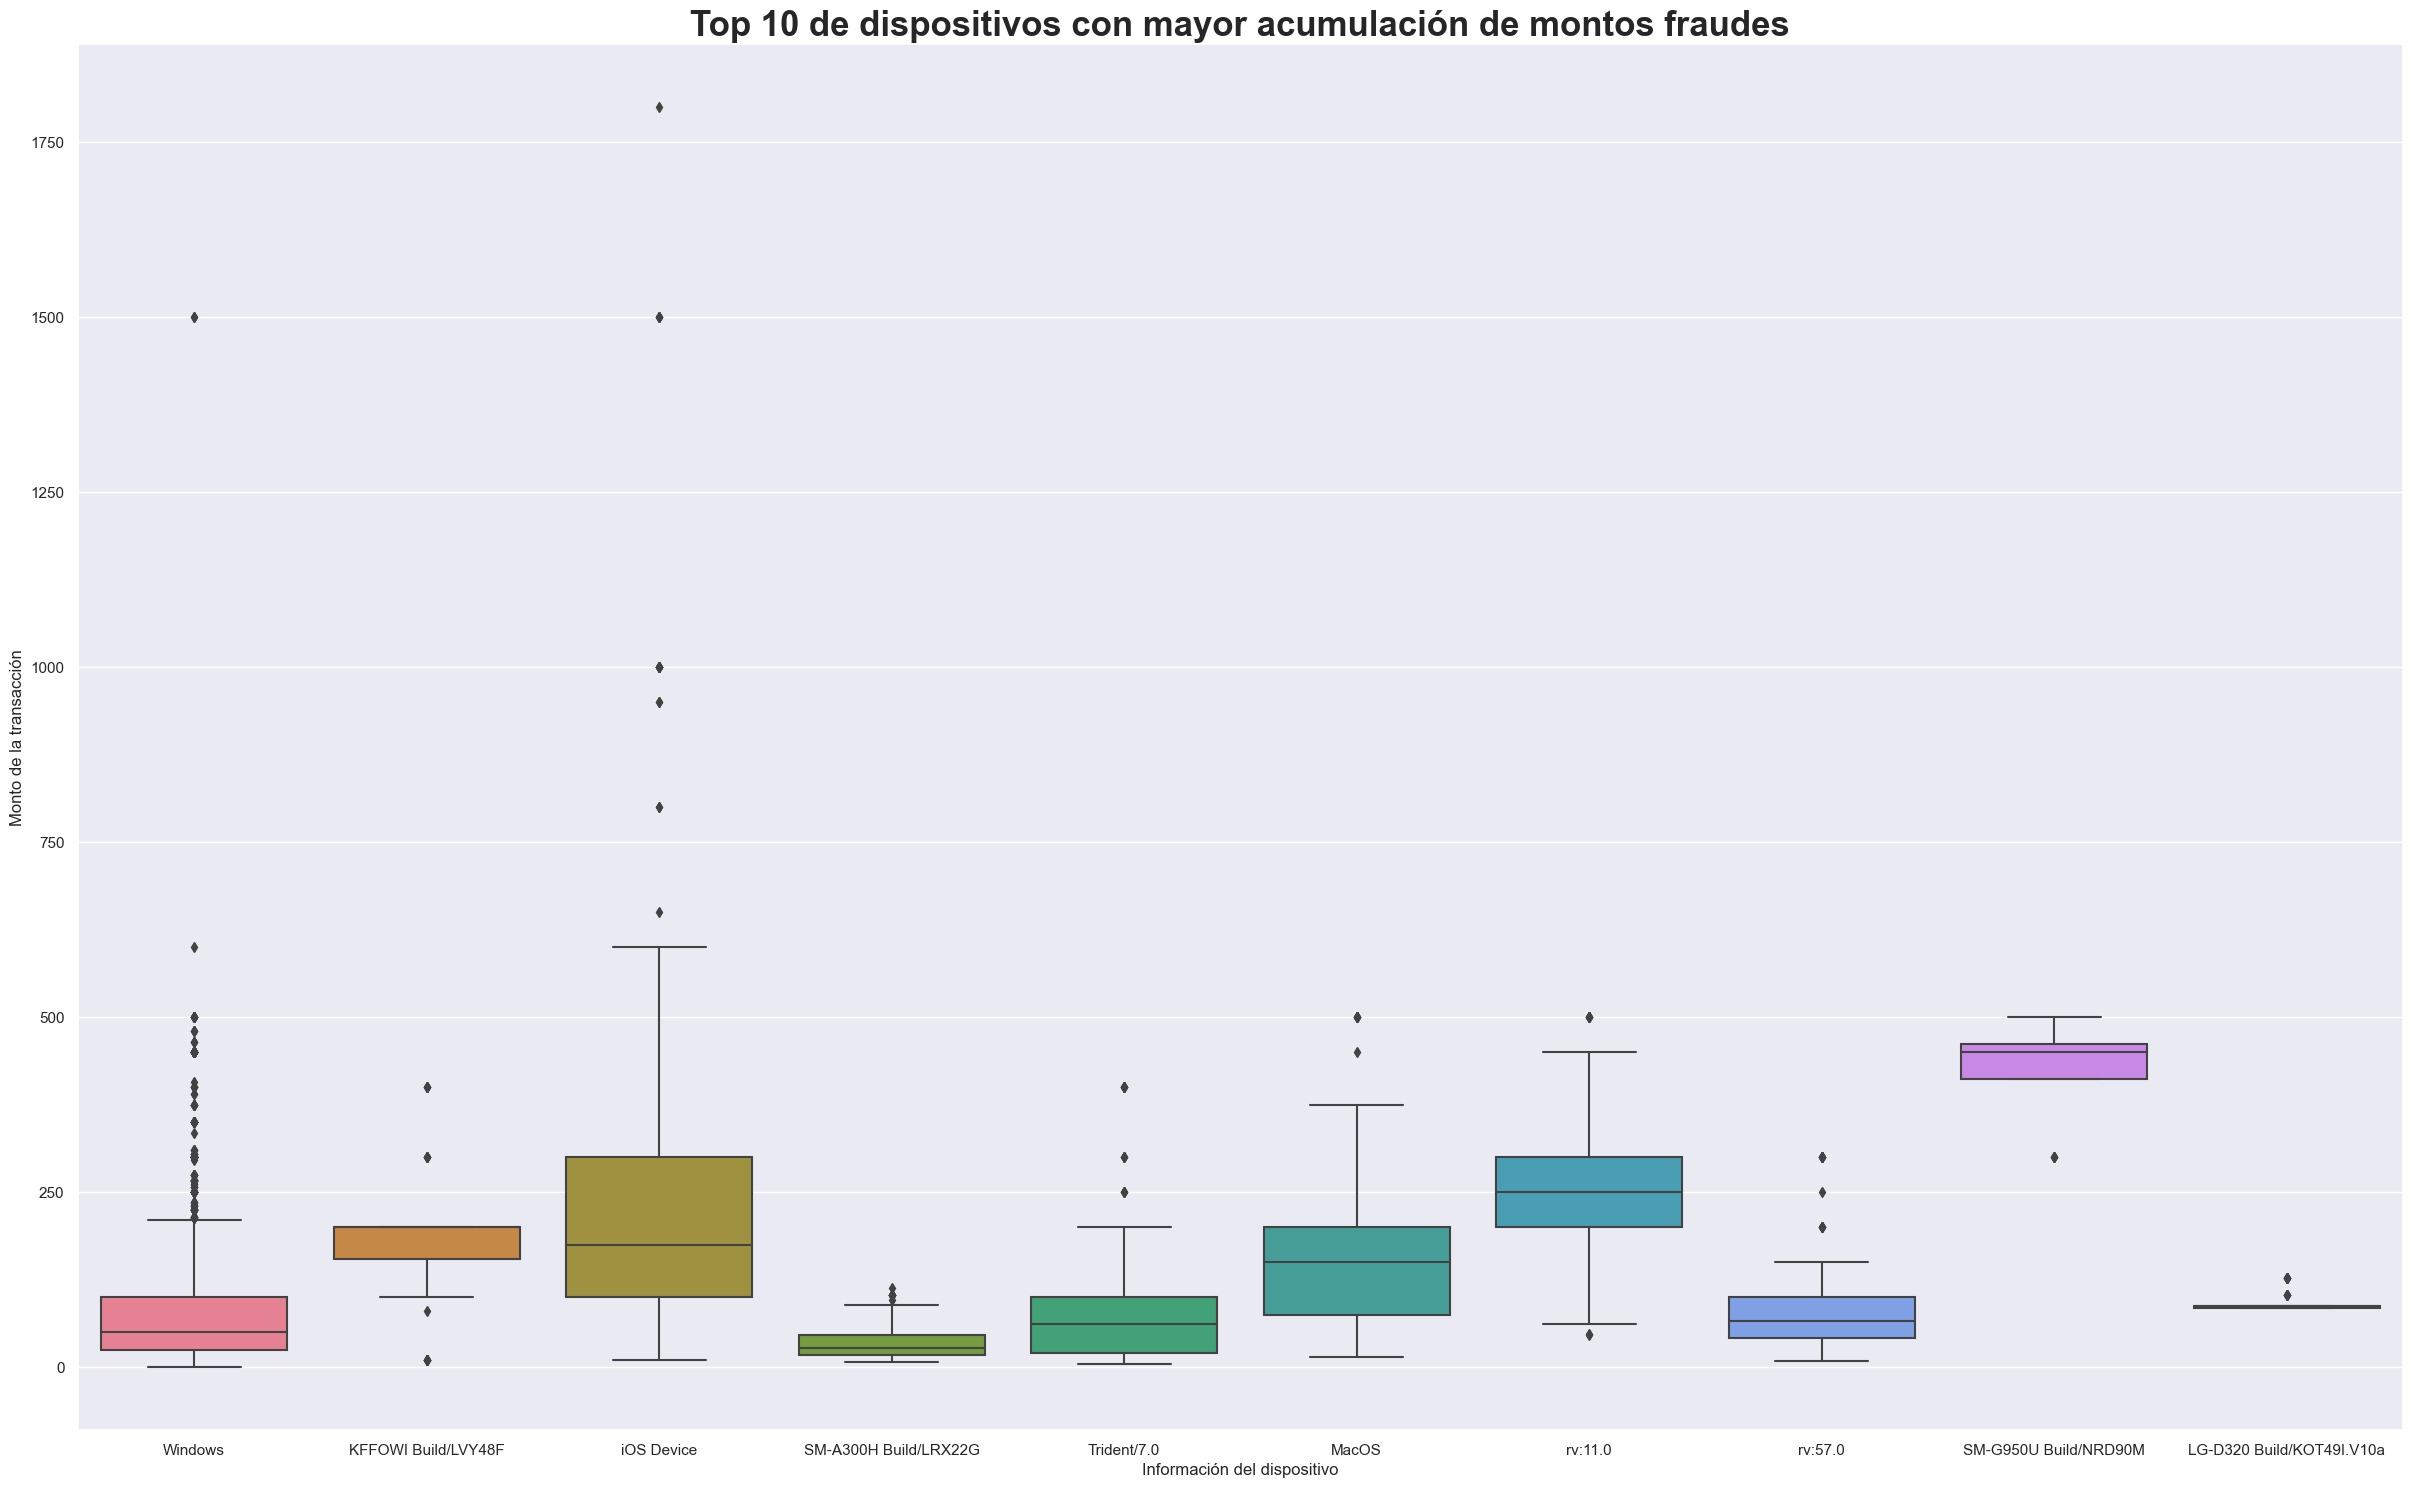

In [262]:
sns.set(rc={'figure.figsize':(30,18)})
sns.boxplot(x=df_top_10_dispositivos_fraudes['Información del dispositivo'], y=df_top_10_dispositivos_fraudes['Monto de la transacción'], palette="husl").set_title("Top 10 de dispositivos con mayor acumulación de montos fraudes", weight = 'bold', size = 25)
plt.show()

#### Gráfico 4

In [263]:
df_train_identity_por_id_13 = df_identities_y_transactions_con_fraude.loc[:, ('TransactionID', 'id_13', 'card4')]
df_train_identity_por_id_13 = df_train_identity_por_id_13.groupby(['card4', 'id_13']).count()
df_train_identity_por_id_13 = df_train_identity_por_id_13.sort_values(by = ['TransactionID'], ascending = False)
df_train_identity_por_id_13 = df_train_identity_por_id_13.rename(columns = {'TransactionID' : 'Cantidad de transacciones fraudes'})
df_train_identity_por_id_13 = df_train_identity_por_id_13.reset_index()
df_train_identity_por_id_13

,card4,id_13,Cantidad de transacciones fraudes
0,visa,52.00,2694
1,mastercard,52.00,1517
2,visa,49.00,1126
3,visa,64.00,963
4,visa,33.00,675
...,...,...,...
87,discover,62.00,1
88,mastercard,39.00,1
89,american express,19.00,1
90,american express,18.00,1


In [264]:
df_train_identity_por_id_13_table = df_train_identity_por_id_13.pivot(index='card4', columns='id_13', values='Cantidad de transacciones fraudes')
df_train_identity_por_id_13_table

id_13,11.00,14.00,15.00,18.00,19.00,20.00,24.00,25.00,27.00,28.00,...,53.00,54.00,55.00,57.00,58.00,60.00,61.00,62.00,63.00,64.00
card4,,,,,,,,,,,,,,,,,,,,,
american express,nan,2.00,1.00,1.00,1.00,2.00,3.00,nan,6.00,nan,...,nan,nan,1.00,nan,nan,nan,nan,1.00,2.00,25.00
discover,1.00,4.00,nan,2.00,4.00,nan,5.00,nan,5.00,nan,...,nan,nan,nan,nan,nan,nan,nan,1.00,2.00,4.00
mastercard,16.00,27.00,3.00,20.00,59.00,69.00,20.00,18.00,200.00,28.00,...,2.00,2.00,18.00,nan,nan,nan,22.00,12.00,12.00,489.00
visa,15.00,26.00,8.00,38.00,148.00,141.00,65.00,48.00,281.00,21.00,...,2.00,2.00,6.00,3.00,3.00,2.00,nan,27.00,33.00,963.00


Text(0.5, 1.0, 'Cantidad de transacciones fraudes de tarjetas Vs. ID 13')

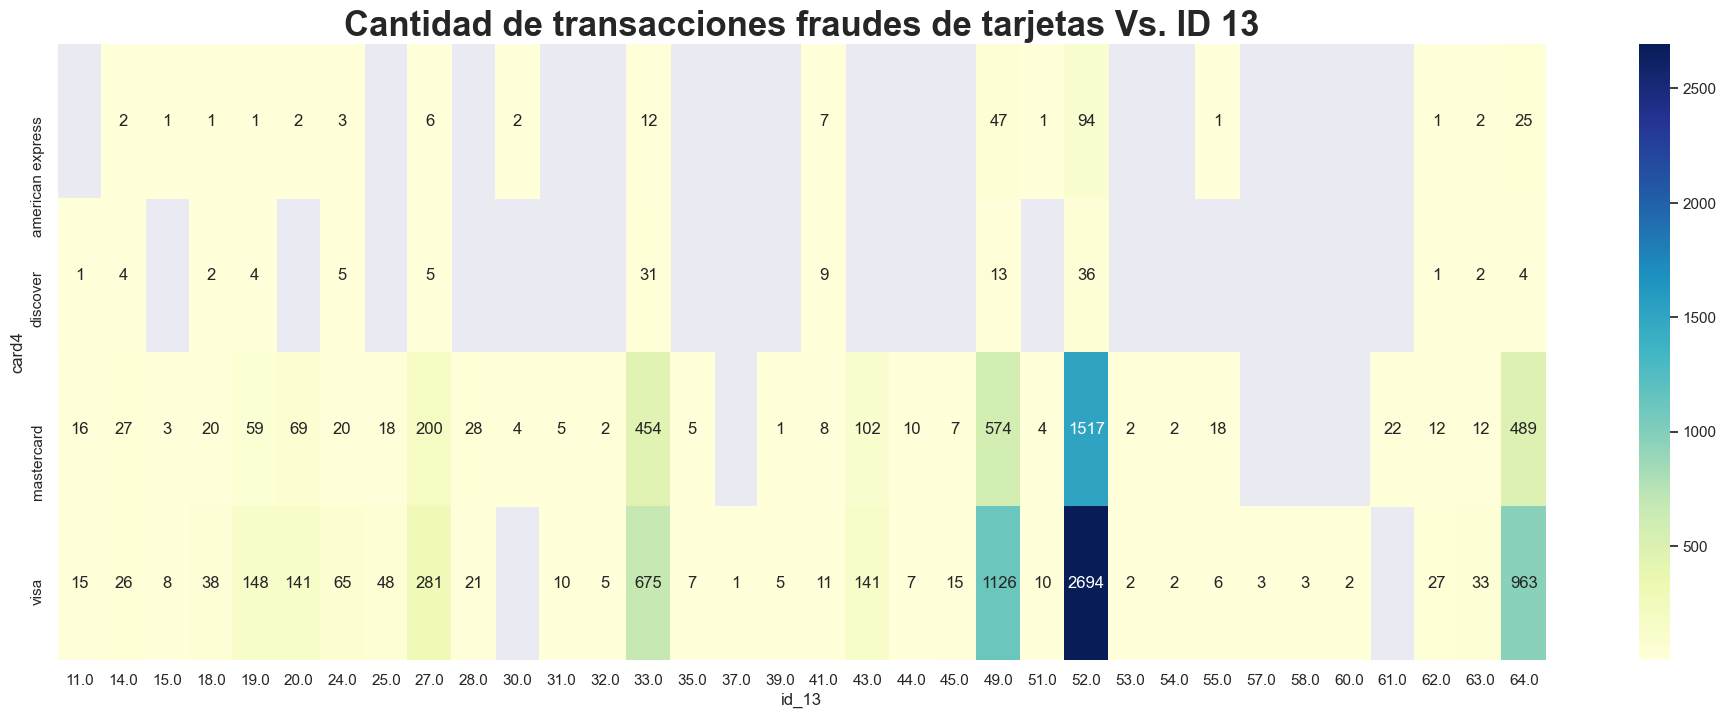

In [265]:
sns.set(rc={'figure.figsize':(24,8)})
train_identity_por_id_13_plot = sns.heatmap(df_train_identity_por_id_13_table, annot=True, cmap = 'YlGnBu', fmt='g')
train_identity_por_id_13_plot.set_title('Cantidad de transacciones fraudes de tarjetas Vs. ID 13', fontweight='bold', size = 25)

#### Gráfico 5

In [266]:
df_train_identity_por_id_33 = df_identities_y_transactions_con_fraude.loc[:, ('TransactionAmt', 'id_33')]
df_train_identity_por_id_33 = df_train_identity_por_id_33.groupby(['id_33']).sum()
df_train_identity_por_id_33 = df_train_identity_por_id_33.rename(columns = {'TransactionAmt' : 'Monto total acumulado por id_33'})
df_train_identity_por_id_33 = df_train_identity_por_id_33.sort_values(by = ['Monto total acumulado por id_33'], ascending = False)
df_train_identity_por_id_33 = df_train_identity_por_id_33.reset_index()
df_train_identity_por_id_33_top_10 = df_train_identity_por_id_33.head(10)
df_train_identity_por_id_33_top_10

,id_33,Monto total acumulado por id_33
0,2208x1242,"102,765.00"
1,1334x750,"82,897.00"
2,1366x768,"81,905.00"
3,1920x1080,"57,034.00"
4,2436x1125,"39,075.00"
5,1280x720,"31,996.00"
6,855x480,"19,505.00"
7,1440x900,"18,540.00"
8,1280x800,"16,799.00"
9,2001x1125,"15,475.00"


In [267]:
df_train_identity_por_id_33 = df_identities_y_transactions_con_fraude.loc[:, ('TransactionAmt', 'id_33')]
df_train_identity_por_id_33

,TransactionAmt,id_33
203,445.00,NaN
240,37.10,NaN
243,37.10,NaN
245,37.10,NaN
288,155.52,NaN
...,...,...
690411,"1,224.00",NaN
690414,69.96,NaN
690420,100.00,2208x1242
690425,117.00,NaN


In [268]:
df_top_10_id_33_fraudes = pd.merge(right = df_train_identity_por_id_33_top_10, left = df_train_identity_por_id_33, left_on='id_33', right_on='id_33', how = 'inner')
df_top_10_id_33_fraudes = df_top_10_id_33_fraudes.dropna()
df_top_10_id_33_fraudes = df_top_10_id_33_fraudes.rename(columns = {'TransactionAmt' : 'Monto de la transacción'})
df_top_10_id_33_fraudes

,Monto de la transacción,id_33,Monto total acumulado por id_33
0,225.00,1440x900,"18,540.00"
1,225.00,1440x900,"18,540.00"
2,225.00,1440x900,"18,540.00"
3,225.00,1440x900,"18,540.00"
4,100.00,1440x900,"18,540.00"
...,...,...,...
2577,250.00,855x480,"19,505.00"
2578,250.00,855x480,"19,505.00"
2579,175.00,855x480,"19,505.00"
2580,175.00,855x480,"19,505.00"


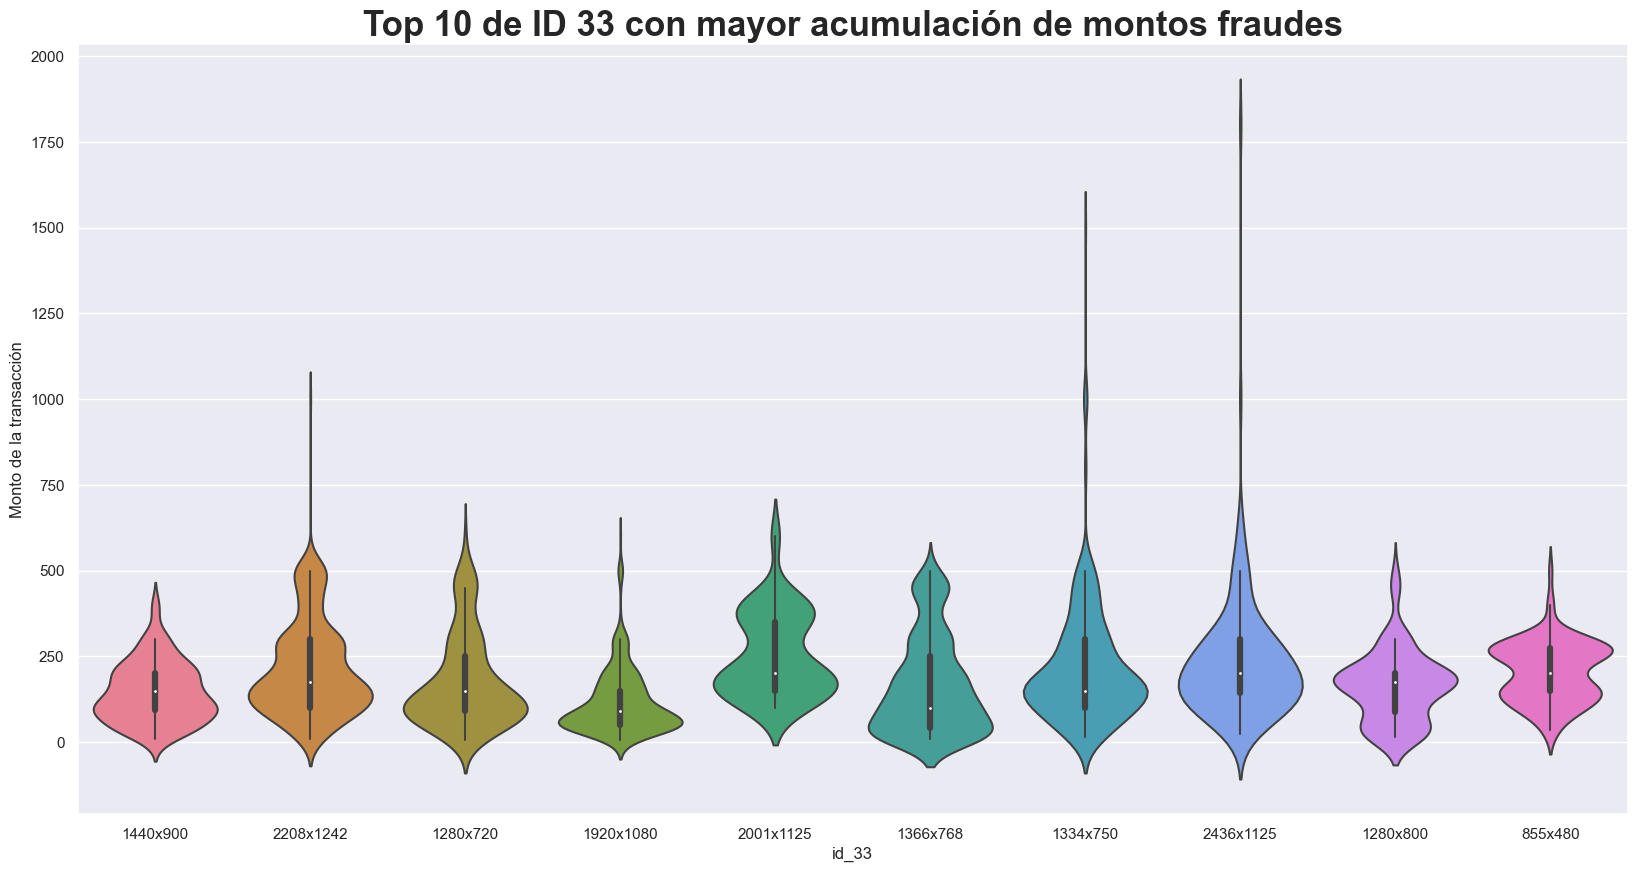

In [269]:
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(x=df_top_10_id_33_fraudes['id_33'], y=df_top_10_id_33_fraudes['Monto de la transacción'], scale="width", palette="husl").set_title("Top 10 de ID 33 con mayor acumulación de montos fraudes", weight = 'bold', size = 25)
plt.show()

#### Gráfico 6

In [270]:
df_train_identity_por_device_type = df_identities_y_transactions_con_fraude.loc[:, ('TransactionAmt', 'DeviceType', 'DeviceInfo')]
df_train_identity_por_device_type = df_train_identity_por_device_type.groupby(['DeviceInfo', 'DeviceType']).sum()
df_train_identity_por_device_type = df_train_identity_por_device_type.rename(columns = {'TransactionAmt' : 'Monto total acumulado por DeviceInfo'})
df_train_identity_por_device_type = df_train_identity_por_device_type.unstack()
#df_train_identity_por_devices = df_train_identity_por_devices.sort_values(by = ['Monto total acumulado por DeviceInfo'], ascending = False)
#df_train_identity_por_device_type = df_train_identity_por_device_type.sort_values(by = ['Monto total acumulado por DeviceInfo']['desktop', 'mobile'], ascending = False)
#df_train_identity_por_devices = df_train_identity_por_devices.reset_index()
#df_train_identity_por_devices_top_10 = df_train_identity_por_devices.head(10)
df_train_identity_por_device_type

Monto total acumulado por DeviceInfo                     
DeviceType                                      desktop               mobile
DeviceInfo                                                                  
0PM92                                               nan                90.51
4013M Build/KOT49H                                  nan                10.84
4047G Build/NRD90M                                  nan                17.46
5010G Build/MRA58K                                  nan               541.63
5011A Build/NRD90M                                  nan               137.60
...                                                 ...                  ...
rv:57.0                                        8,788.99               380.83
rv:58.0                                        4,594.68               876.98
rv:59.0                                        2,354.62             1,322.62
rv:60.0                                           68.88               402.66
rv:61.0                                             nan                73.78

[420 rows x 2 columns]

In [271]:
df_train_identity_por_device_type = df_identities_y_transactions_con_fraude.loc[:, ('TransactionAmt', 'DeviceType', 'DeviceInfo')]
df_train_identity_por_device_type = df_train_identity_por_device_type.groupby(['DeviceInfo', 'DeviceType']).sum()
df_train_identity_por_device_type = df_train_identity_por_device_type.rename(columns = {'TransactionAmt' : 'Monto total acumulado por DeviceInfo'})
#df_train_identity_por_device_type = df_train_identity_por_device_type.unstack()
#df_train_identity_por_devices = df_train_identity_por_devices.sort_values(by = ['Monto total acumulado por DeviceInfo'], ascending = False)
#df_train_identity_por_device_type = df_train_identity_por_device_type.sort_values(by = ['Monto total acumulado por DeviceInfo']['desktop', 'mobile'], ascending = False)
#df_train_identity_por_devices = df_train_identity_por_devices.reset_index()
#df_train_identity_por_devices_top_10 = df_train_identity_por_devices.head(10)

df_train_identity_por_device_type = df_train_identity_por_device_type.reset_index()
df_train_identity_por_device_type

,DeviceInfo,DeviceType,Monto total acumulado por DeviceInfo
0,0PM92,mobile,90.51
1,4013M Build/KOT49H,mobile,10.84
2,4047G Build/NRD90M,mobile,17.46
3,5010G Build/MRA58K,mobile,541.63
4,5011A Build/NRD90M,mobile,137.60
...,...,...,...
448,rv:59.0,desktop,"2,354.62"
449,rv:59.0,mobile,"1,322.62"
450,rv:60.0,desktop,68.88
451,rv:60.0,mobile,402.66


In [272]:
df_train_identity_por_devices_type_top_50 = df_train_identity_por_devices.head(50)
df_train_identity_por_devices_type_top_50

,DeviceInfo,Monto total acumulado por DeviceInfo
0,iOS Device,"269,517.00"
1,Windows,"261,684.46"
2,MacOS,"42,741.00"
3,rv:11.0,"19,804.63"
4,KFFOWI Build/LVY48F,"9,365.00"
5,rv:57.0,"9,169.82"
6,Trident/7.0,"8,840.10"
7,SM-G950U Build/NRD90M,"6,800.00"
8,SM-A300H Build/LRX22G,"6,119.73"
9,LG-D320 Build/KOT49I.V10a,"5,575.89"


Text(0.5, 1.0, 'Top 50 de montos totales acumulados fraudes por información del dispositivo')

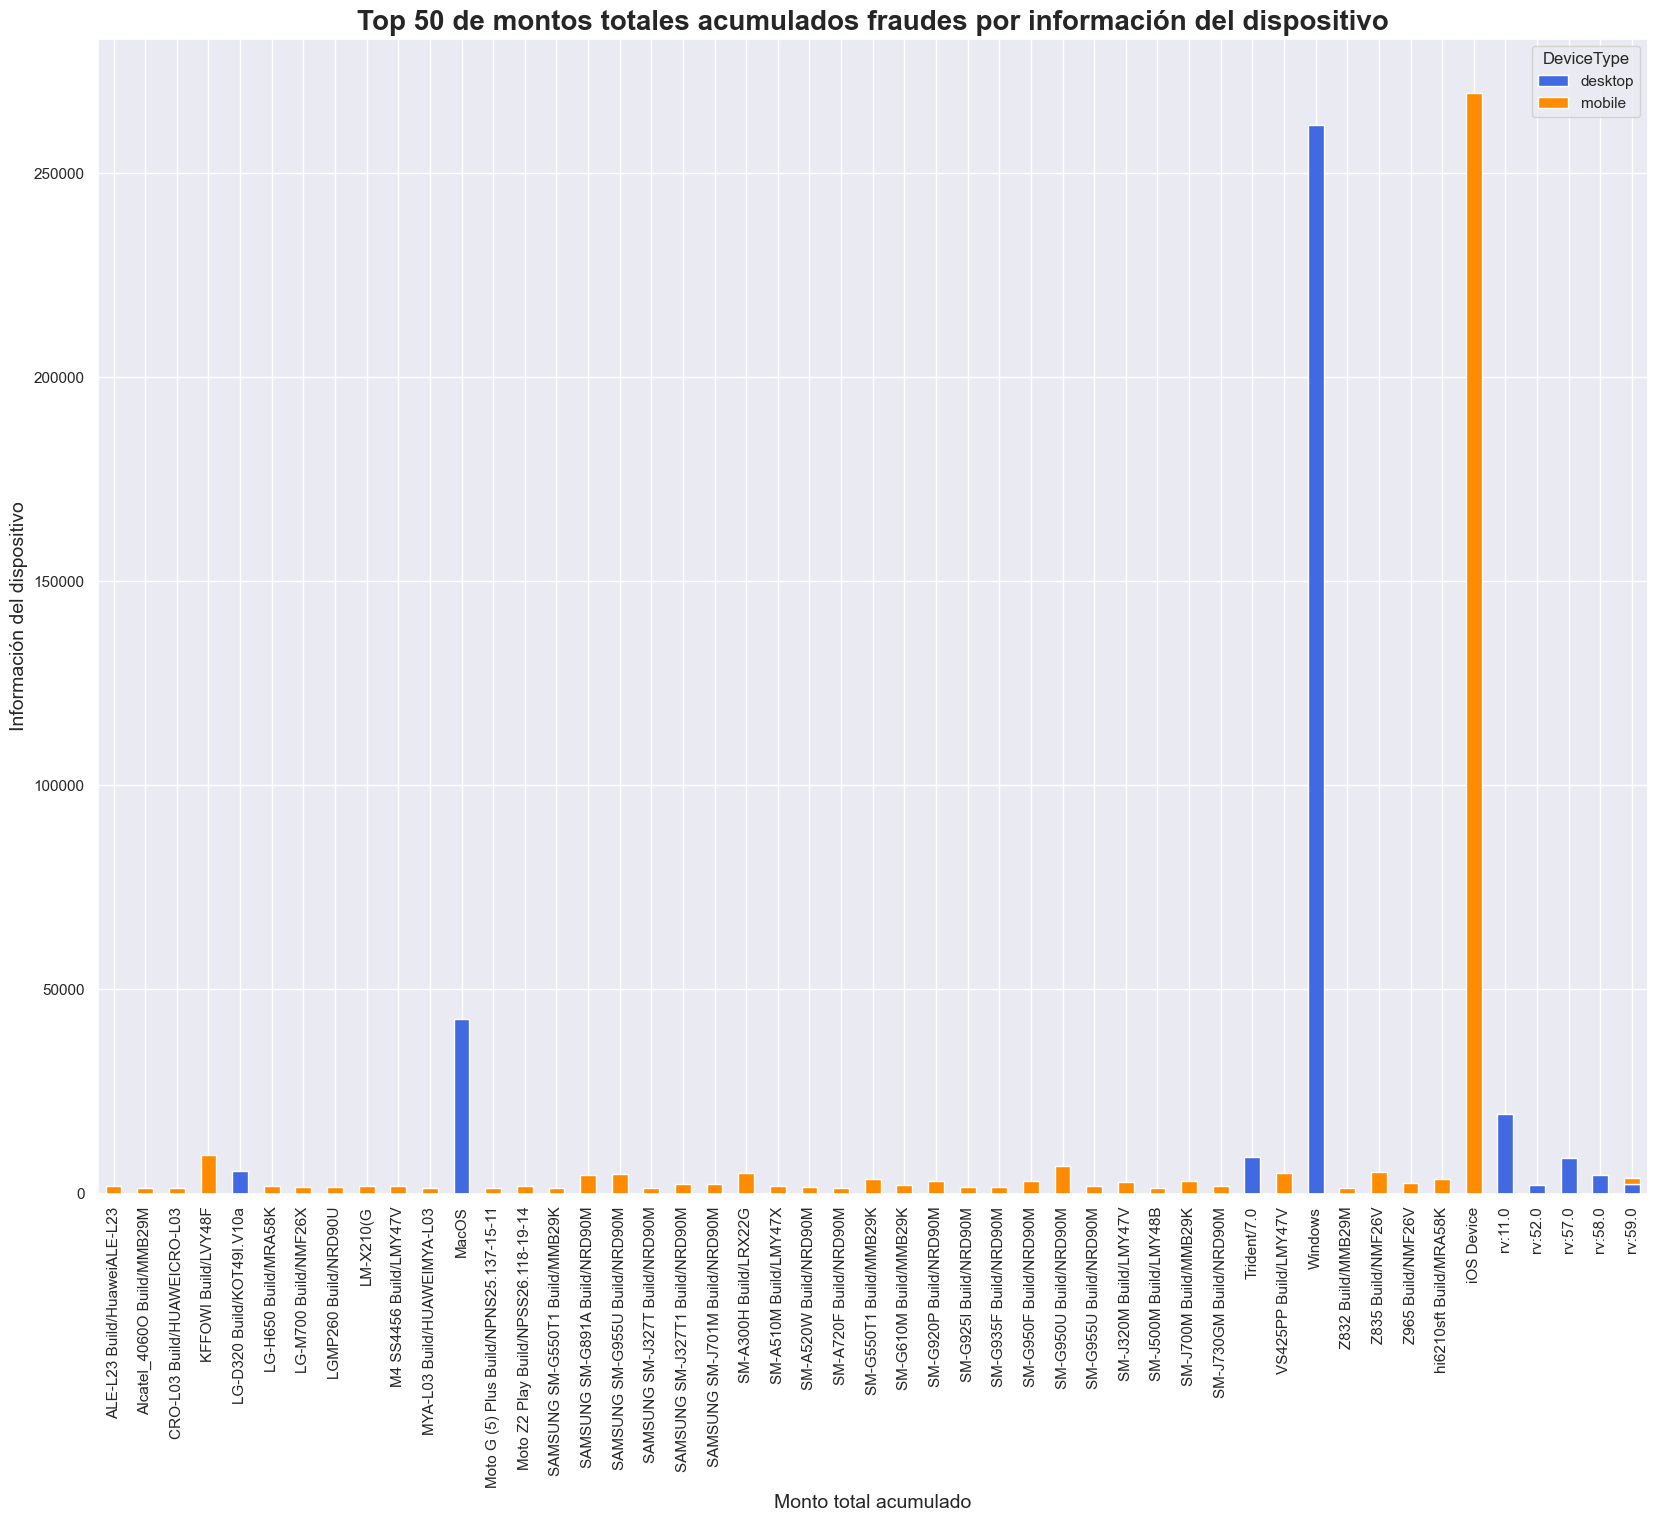

In [273]:
plot_train_identity_por_device_type = df_train_identity_por_device_type_table.plot.bar(stacked = True, rot=90, color={"royalblue", "darkorange"}, figsize=(20,15))
plt.xlabel('Monto total acumulado', size = 14)
plt.ylabel('Información del dispositivo', size = 14)
plt.title('Top 50 de montos totales acumulados fraudes por información del dispositivo', fontweight='bold', size = 20)

#### Gráficos extras

In [274]:
df_train_identity_por_total_acumulado = df_identities_y_transactions_con_fraude.loc[:, ('TransactionID', 'TransactionAmt')]
df_train_identity_por_total_acumulado = df_train_identity_por_total_acumulado.groupby(['TransactionID']).sum()
df_train_identity_por_total_acumulado = df_train_identity_por_total_acumulado.rename(columns = {'TransactionAmt' : 'Monto total acumulado'})
df_train_identity_por_total_acumulado = df_train_identity_por_total_acumulado.reset_index()
df_train_identity_por_total_acumulado

,TransactionID,Monto total acumulado
0,2987203,445.00
1,2987240,37.10
2,2987243,37.10
3,2987245,37.10
4,2987288,155.52
...,...,...
20658,3577361,"1,224.00"
20659,3577364,69.96
20660,3577368,100.00
20661,3577372,117.00


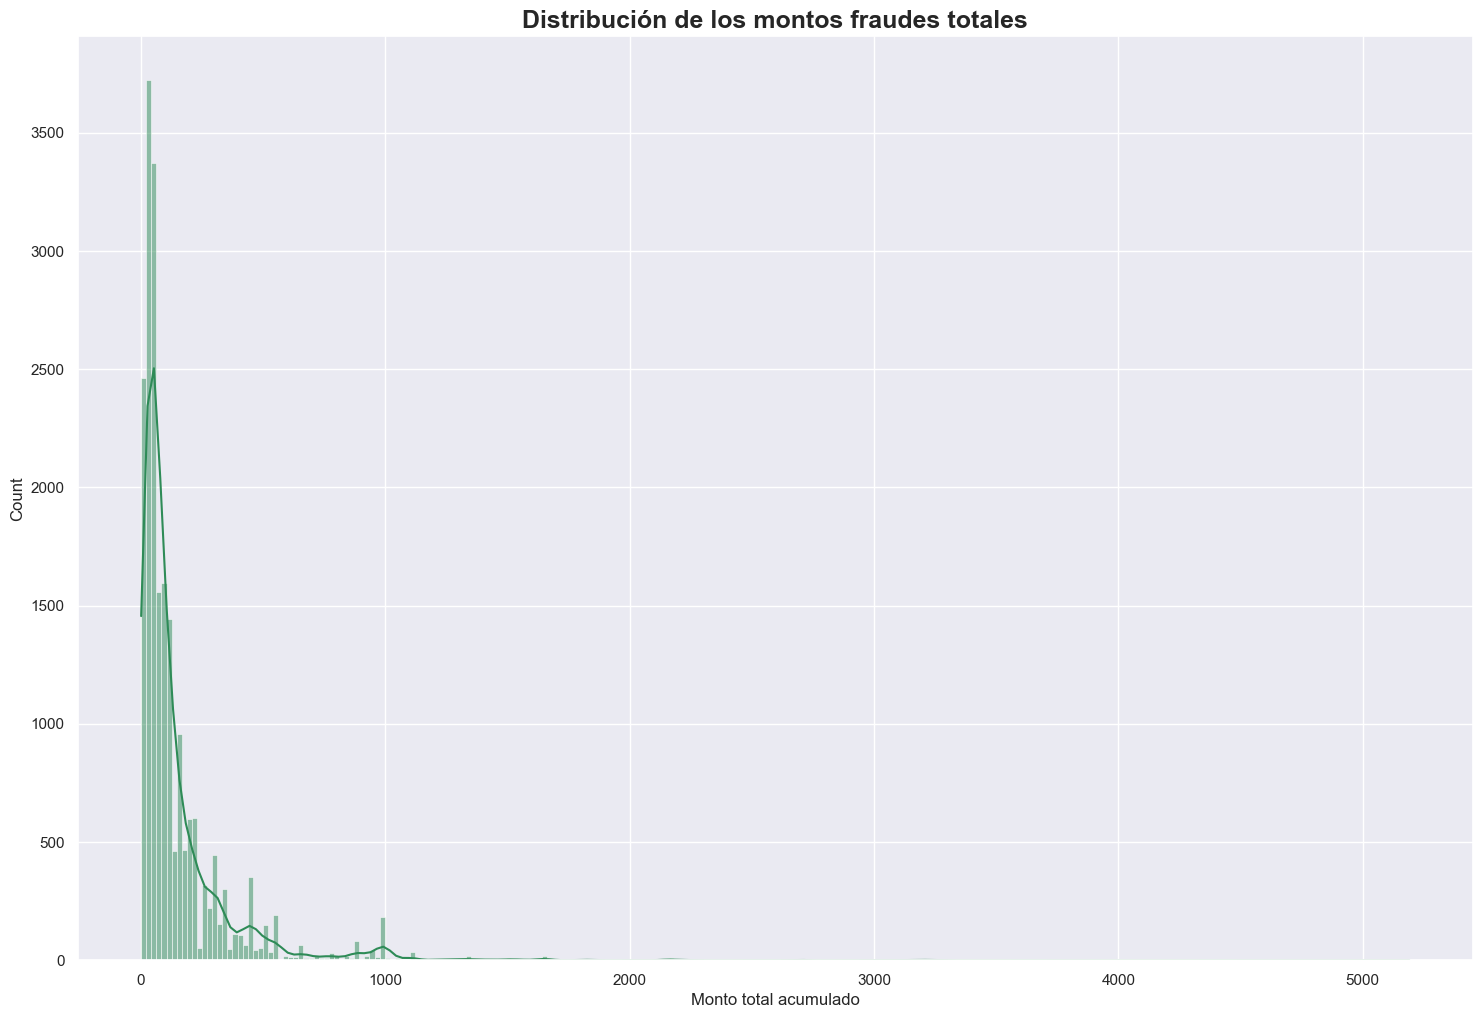

In [275]:
sns.set(rc={'figure.figsize':(18,12)})
sns.histplot(data=df_train_identity_por_total_acumulado, x="Monto total acumulado", bins=250, color = 'seagreen', kde=True).set_title('Distribución de los montos fraudes totales', fontweight='bold', size = 18)
plt.show()

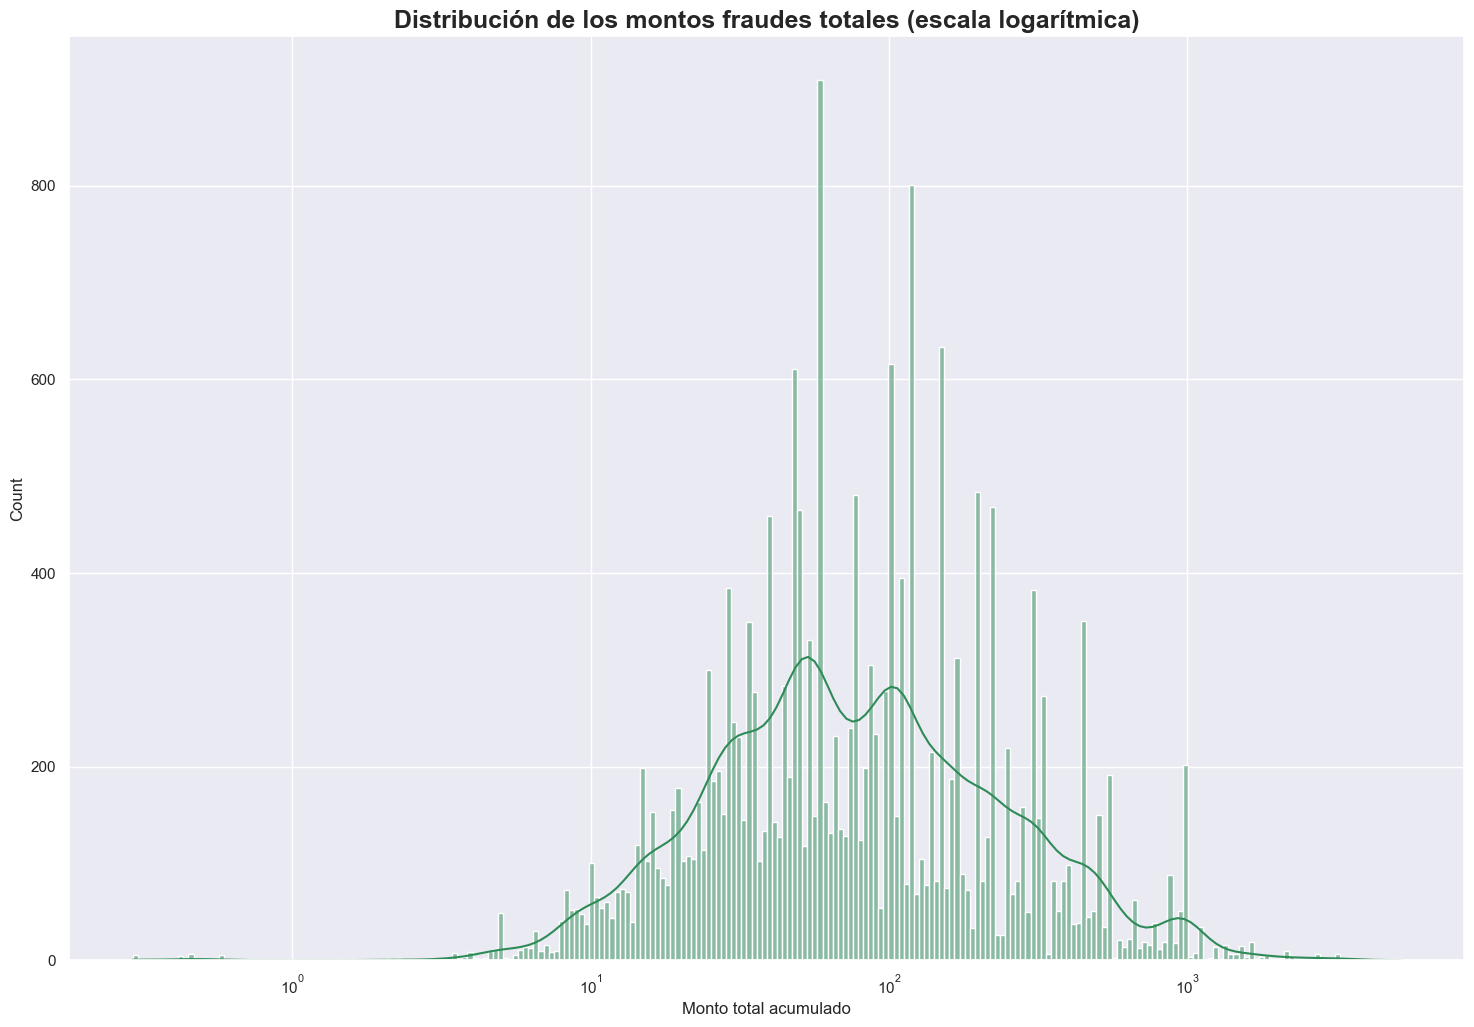

In [276]:
sns.set(rc={'figure.figsize':(18,12)})
sns.histplot(data=df_train_identity_por_total_acumulado, x="Monto total acumulado", bins=250, color = 'seagreen', kde=True, log_scale=True).set_title('Distribución de los montos fraudes totales (escala logarítmica)', fontweight='bold', size = 18)
plt.show()

In [282]:
df_train_identity_por_id_17 = df_identities_y_transactions.loc[:, ('TransactionID', 'isFraud', 'id_17')]
df_train_identity_por_id_17 = df_train_identity_por_id_17.groupby(['id_17', 'isFraud']).count()
df_train_identity_por_id_17 = df_train_identity_por_id_17.rename(columns = {'TransactionID' : 'Cantidad de transacciones correspondientes por id_17'})
df_train_identity_por_id_17 = df_train_identity_por_id_17.unstack()
df_train_identity_por_id_17

Cantidad de transacciones correspondientes por id_17  \
isFraud                                                False   
id_17                                                          
100.00                                              303.00     
101.00                                                9.00     
102.00                                              613.00     
105.00                                                1.00     
106.00                                               54.00     
...                                                    ...     
220.00                                                1.00     
225.00                                           49,517.00     
226.00                                                5.00     
228.00                                                8.00     
229.00                                                1.00     

                              
isFraud                True   
id_17                         
100.00                 33.00  
101.00                   nan  
102.00                 76.00  
105.00                   nan  
106.00                 10.00  
...                      ...  
220.00                   nan  
225.00              7,452.00  
226.00                  1.00  
228.00                   nan  
229.00                   nan  

[104 rows x 2 columns]

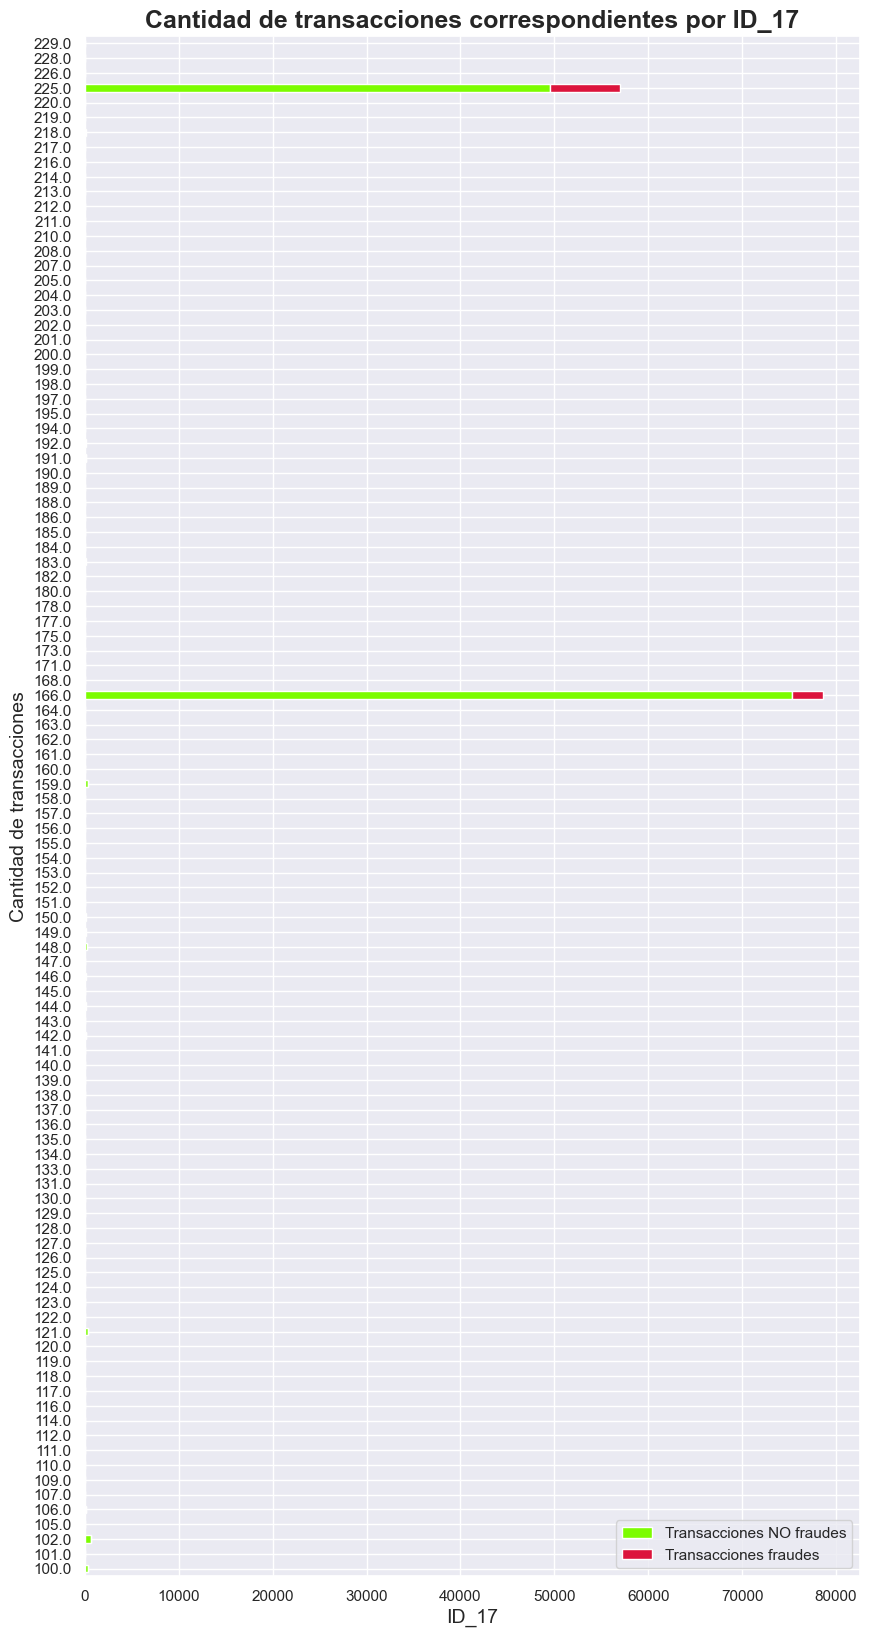

In [285]:
df_train_identity_por_id_17.plot.barh(stacked = True, rot = 0, color = {'crimson','lawngreen'}, figsize=(10,20))
plt.xlabel('ID_17', size = 14)
plt.ylabel('Cantidad de transacciones', size = 14)
plt.legend(("Transacciones NO fraudes","Transacciones fraudes"),loc="lower right")
plt.title('Cantidad de transacciones correspondientes por ID_17', fontweight='bold', size = 18)
plt.show()

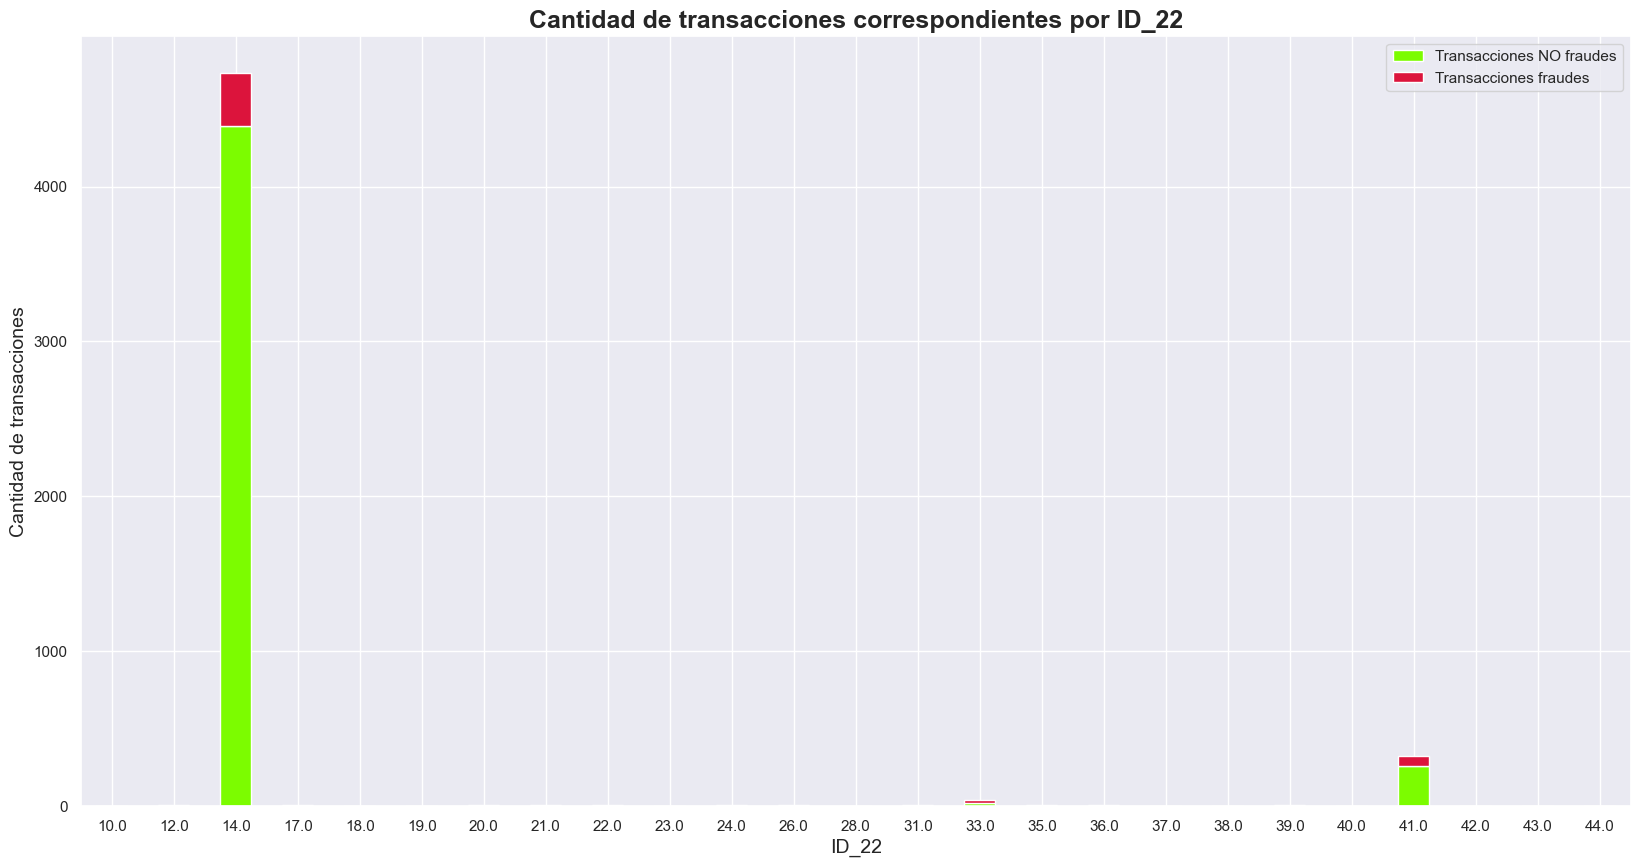

In [289]:
df_train_identity_por_id_22 = df_identities_y_transactions.loc[:, ('TransactionID', 'isFraud', 'id_22')]
df_train_identity_por_id_22 = df_train_identity_por_id_22.groupby(['id_22', 'isFraud']).count()
df_train_identity_por_id_22 = df_train_identity_por_id_22.rename(columns = {'TransactionID' : 'Cantidad de transacciones correspondientes por id_17'})
df_train_identity_por_id_22 = df_train_identity_por_id_22.unstack()
df_train_identity_por_id_22

df_train_identity_por_id_22.plot.bar(stacked = True, rot = 0, color = {'crimson','lawngreen'}, figsize=(20,10))
plt.xlabel('ID_22', size = 14)
plt.ylabel('Cantidad de transacciones', size = 14)
plt.legend(("Transacciones NO fraudes","Transacciones fraudes"),loc="upper right")
plt.title('Cantidad de transacciones correspondientes por ID_22', fontweight='bold', size = 18)
plt.show()